# Final Analyse 

In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
from glob import glob
from matplotlib import colors
#import 

In [ ]:
## Concat all diff data set for each event with data set, original precipitation, etc...

In [22]:
list_in = ['Tessin_2020', 'Cartagena_2019', 'EU_2016', 'Norway_2017', 'UK_2020'] #list all event name
list_data = ['EOBS', 'ERA5', 'EURADCLIM', 'IMERG', 'MSWEP', 'EURADCLIM'] #list all data set name
dat= []


for i in list_in:
    dfs =[]
    print(f'/home/adelaly/BA_work/output/{i}/{i}_diff.csv')
    file_path = f'/home/adelaly/BA_work/output/{i}/{i}_diff.csv'
    df = pd.read_csv(file_path)
    print(df.shape)
    ds = pd.read_csv(f'/home/adelaly/BA_work/output/{i}/{list_data[0]}_regrid.csv')
    print(ds.shape)
    dfs.append(df)
    dat.append(pd.concat(dfs))
dat = pd.concat(dat)




/home/adelaly/BA_work/output/Tessin_2020/Tessin_2020_diff.csv
(1026, 8)
(171, 3)
/home/adelaly/BA_work/output/Cartagena_2019/Cartagena_2019_diff.csv
(1014, 8)
(169, 3)
/home/adelaly/BA_work/output/EU_2016/EU_2016_diff.csv
(2142, 8)
(357, 3)
/home/adelaly/BA_work/output/Norway_2017/Norway_2017_diff.csv
(972, 8)
(162, 3)
/home/adelaly/BA_work/output/UK_2020/UK_2020_diff.csv
(1014, 8)
(169, 3)


,Unnamed: 0,longitude,latitude,precipitation,difference,squared_diff,dataset,event
0,0,6.00,45.0,60.298606,0.070299,0.004942,EOBS,Tessin_2020
1,1,6.25,45.0,66.287030,8.357243,69.843503,EOBS,Tessin_2020
2,2,6.50,45.0,79.408795,15.830073,250.591201,EOBS,Tessin_2020
3,3,6.75,45.0,79.061894,18.546386,343.968452,EOBS,Tessin_2020
4,4,7.00,45.0,78.930893,24.004376,576.210064,EOBS,Tessin_2020
...,...,...,...,...,...,...,...,...
1009,164,-3.00,53.5,23.673678,-11.092333,123.039860,Local,UK_2020
1010,165,-2.75,53.5,22.293634,-9.342242,87.277491,Local,UK_2020
1011,166,-2.50,53.5,22.541736,-10.074349,101.492518,Local,UK_2020
1012,167,-2.25,53.5,25.635198,-9.873648,97.488934,Local,UK_2020


## Make some adjustment

In [26]:
dat_df = pd.DataFrame(dat)
def_df = dat_df.reset_index()
def_df['event'] = def_df['event'].str.replace('_', ' ')
def_df['dataset'] = def_df['dataset'].str.replace('EOBS','E-OBS')
def_df['event'] = def_df['event'].str.replace('Tessin', 'Ticino')

      index  Unnamed: 0  longitude  latitude  precipitation  difference  \
0         0           0       6.00      45.0      60.298606    0.070299   
1         1           1       6.25      45.0      66.287030    8.357243   
2         2           2       6.50      45.0      79.408795   15.830073   
3         3           3       6.75      45.0      79.061894   18.546386   
4         4           4       7.00      45.0      78.930893   24.004376   
...     ...         ...        ...       ...            ...         ...   
6163   1009         164      -3.00      53.5      23.673678  -11.092333   
6164   1010         165      -2.75      53.5      22.293634   -9.342242   
6165   1011         166      -2.50      53.5      22.541736  -10.074349   
6166   1012         167      -2.25      53.5      25.635198   -9.873648   
6167   1013         168      -2.00      53.5      32.230598   -6.979620   

      squared_diff dataset        event  
0         0.004942   E-OBS  Ticino 2020  
1        69.843

## Plot the boxplot of difference

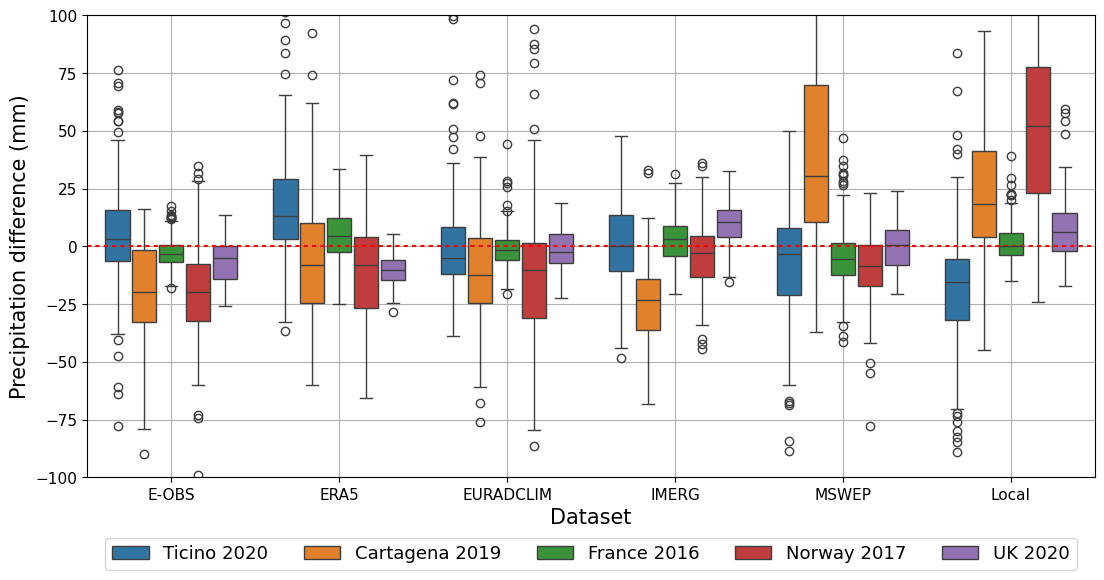

In [27]:

import seaborn as sns

plt.figure(figsize=(13, 6))
ax = sns.boxplot(data=def_df, y='difference', x='dataset', hue='event', gap = .1) # Pass the final dataframe to the boxplot
#plt.title('Precipitation by Dataset and Event', fontsize = 18)
plt.xlabel('Dataset',fontsize = 15)
plt.ylabel('Precipitation difference (mm)',fontsize = 15)
ax.axhline(0, color="red", dashes=(2, 2))
plt.ylim(-100, 100)
plt.grid(True)
plt.legend(bbox_to_anchor=(0.5, -0.13), loc='upper center', borderaxespad=0.,
           ncol=len(dat['event'].unique()), fontsize = 13)
ax.tick_params(axis='x', labelsize=11)  # Example: set x-axis tick label size to 14
ax.tick_params(axis='y', labelsize=11)
plt.savefig('boxplot_final.png', bbox_inches='tight')
plt.savefig('boxplot_final.pdf')
plt.show()



In [28]:
def_df = def_df.reset_index()

## Make a barplot with 95th percentile

<Figure size 1200x600 with 0 Axes>

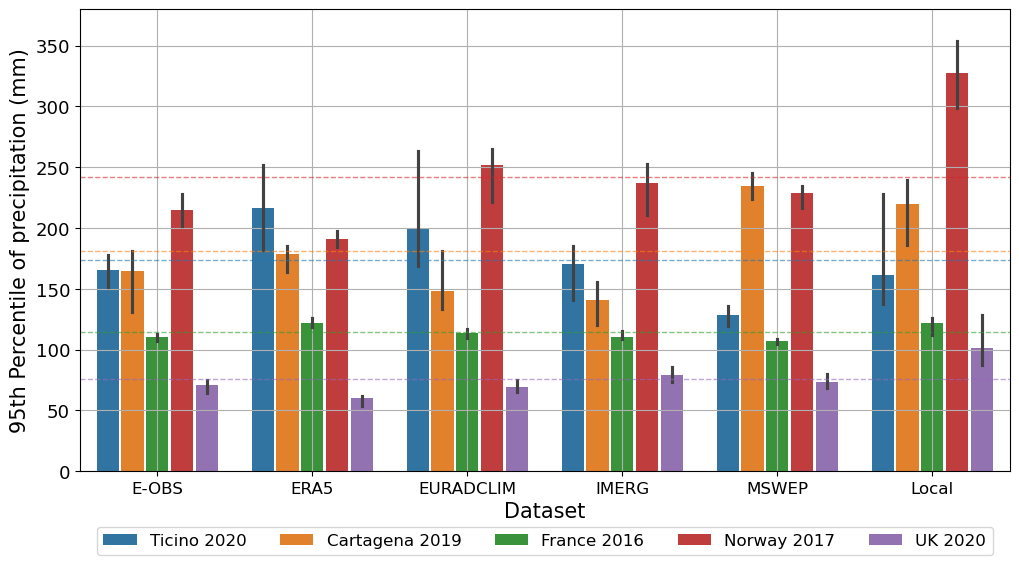

In [37]:
plt.figure(figsize=(12, 6))
default_palette = sns.color_palette(n_colors=len(dat_events))

# Create a mapping from event name to color using the default palette
event_color_map = {event: default_palette[i] for i, event in enumerate(dat_events)}


# 4. Create the bar plot
plt.figure(figsize=(12, 6))

ax = sns.barplot(data=def_df, y='precipitation', x='dataset', hue='event',
                 estimator=lambda x: pd.Series(x).quantile(0.95),
                 gap=.1,
                 palette=event_color_map) # Use the explicitly defined color map

# 5. Add the dashed lines for each event's mean 95th percentile
for index, row in mean_overall_95th_percentiles_by_event.iterrows():
    event_name = row['event']
    mean_val = row['mean_overall_95th_percentile']
    line_color = event_color_map.get(event_name, 'black') # Get color from the map

    ax.axhline(y=mean_val,
               xmin=0,
               xmax=1,
               color=line_color,
               linestyle='--',
               linewidth=1,
              alpha = 0.6)
    
plt.xlabel('Dataset',fontsize = 15)
plt.ylabel('95th Percentile of precipitation (mm)',fontsize = 15)
plt.ylim(0, 380)
plt.grid(True)
plt.legend(bbox_to_anchor=(0.5, -0.12), loc='upper center', borderaxespad=0.,
           ncol=len(dat['event'].unique()), fontsize = 12)
ax.tick_params(axis='x', labelsize=12)  # Example: set x-axis tick label size to 14
ax.tick_params(axis='y', labelsize=13)
plt.savefig('barplot_final.png', bbox_inches='tight')
plt.savefig('barplot_final.pdf')
plt.show()


## Calculate pattern correlation

In [166]:
list_in = ['Tessin_2020', 'Cartagena_2019', 'EU_2016', 'Norway_2017', 'UK_2020']
list_data = ['EOBS', 'ERA5', 'IMERG', 'MSWEP', 'EURADCLIM']
coef = {}
for i in list_data:
    coef[i] = {}
    coef[i]['coef'] = []
    coef[i]['mean'] = 0.0
    coef[i]['IQR'] = 0.0


for i in list_in:
    dfs =[]
    print(f'/home/adelaly/BA_work/output/{i}/{i}_coef.npy')
    file_path = f'/home/adelaly/BA_work/output/{i}/{i}_coef.npy'
    df = np.load(file_path)
    y = 1
    for i in coef.keys():
        coef[i]['coef'].append(df[y])
        y += 1

    

/home/adelaly/BA_work/output/Tessin_2020/Tessin_2020_coef.npy
/home/adelaly/BA_work/output/Cartagena_2019/Cartagena_2019_coef.npy
/home/adelaly/BA_work/output/EU_2016/EU_2016_coef.npy
/home/adelaly/BA_work/output/Norway_2017/Norway_2017_coef.npy
/home/adelaly/BA_work/output/UK_2020/UK_2020_coef.npy


In [167]:
for i in coef.keys():
    coef[i]['mean'] = round(sum(coef[i]['coef'])/len(coef[i]['coef']),3)

In [168]:
for i in coef.keys():
    data = np.array(coef[i]['coef'])
    
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    coef[i]['IQR'] = round(iqr,3)

In [181]:
coef

{'EOBS': {'coef': [0.6261135368240216,
   0.6956736450518259,
   0.9256021108024449,
   0.6471500458485648,
   0.6377845193391865],
  'mean': 0.706,
  'IQR': 0.058},
 'ERA5': {'coef': [0.6784434498947385,
   0.7356786314323931,
   0.7999853951375717,
   0.7199597438688241,
   0.7225596169705638],
  'mean': 0.731,
  'IQR': 0.016},
 'IMERG': {'coef': [0.8882240337104637,
   0.7408124565161521,
   0.8374383124624802,
   0.801443288359059,
   0.4959845663726478],
  'mean': 0.753,
  'IQR': 0.097},
 'MSWEP': {'coef': [0.6768919122499327,
   0.6249901431108449,
   0.7569578180063556,
   0.7372914486722871,
   0.6847307124446562],
  'mean': 0.696,
  'IQR': 0.06},
 'EURADCLIM': {'coef': [0.7592963368265707,
   0.7399121760672968,
   0.9355437236434073,
   0.6286373808691647,
   0.6718671688981578],
  'mean': 0.747,
  'IQR': 0.087}}

## Calculate the sdev

In [241]:
list_in = ['Tessin_2020', 'Cartagena_2019', 'EU_2016', 'Norway_2017', 'UK_2020']
list_data = ['EOBS', 'ERA5', 'IMERG', 'MSWEP', 'EURADCLIM']
sdev = {}
for i in list_data:
    sdev[i] = {}
    sdev[i]['sdev'] = []
    sdev[i]['mean'] = 0.0
    sdev[i]['IQR'] = 0.0


for i in list_in:
    dfs =[]
    print(f'/home/adelaly/BA_work/output/{i}/{i}_sdev.npy')
    file_path = f'/home/adelaly/BA_work/output/{i}/{i}_sdev.npy'
    df = np.load(file_path)
    y = 1
    print(df[0])
    for i in sdev.keys():
        sdev[i]['sdev'].append(df[y])
        y += 1

    

/home/adelaly/BA_work/output/Tessin_2020/Tessin_2020_sdev.npy
1.0
/home/adelaly/BA_work/output/Cartagena_2019/Cartagena_2019_sdev.npy
1.0
/home/adelaly/BA_work/output/EU_2016/EU_2016_sdev.npy
1.0
/home/adelaly/BA_work/output/Norway_2017/Norway_2017_sdev.npy
1.0
/home/adelaly/BA_work/output/UK_2020/UK_2020_sdev.npy
1.0


In [174]:
for i in sdev.keys():
    sdev[i]['mean'] = round(sum(sdev[i]['sdev'])/len(sdev[i]['sdev']),3)

In [175]:
for i in sdev.keys():
    data = np.array(sdev[i]['sdev'])
    
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    sdev[i]['IQR'] = round(iqr,3)

In [176]:
sdev

{'EOBS': {'sdev': [0.8653926767694854,
   0.6901045504843282,
   0.8867687741334394,
   0.7807827068279738,
   0.575474081355336],
  'mean': 0.76,
  'IQR': 0.175},
 'ERA5': {'sdev': [1.1265377025795433,
   0.9295171870487029,
   0.8981879014179307,
   0.5917222595995261,
   0.4729822396117432],
  'mean': 0.804,
  'IQR': 0.338},
 'IMERG': {'sdev': [0.7690004353672739,
   0.810044869917673,
   0.7996827846527227,
   0.7423943959652419,
   0.43941529443822325],
  'mean': 0.712,
  'IQR': 0.057},
 'MSWEP': {'sdev': [0.5734970958078202,
   1.4093236324921987,
   0.8235145424528709,
   0.7328708878099505,
   0.6992902402446007],
  'mean': 0.848,
  'IQR': 0.124},
 'EURADCLIM': {'sdev': [1.14806656817332,
   0.9052844409940163,
   0.9151855237250185,
   0.8064625387936858,
   0.52585412007234],
  'mean': 0.86,
  'IQR': 0.109}}

## Calculate the cRMSD

In [177]:
list_in = ['Tessin_2020', 'Cartagena_2019', 'EU_2016', 'Norway_2017', 'UK_2020']
list_data = ['EOBS', 'ERA5', 'IMERG', 'MSWEP', 'EURADCLIM']
crmsd = {}
for i in list_data:
    crmsd[i] = {}
    crmsd[i]['crmsd'] = []
    crmsd[i]['mean'] = 0.0
    crmsd[i]['IQR'] = 0.0


for i in list_in:
    dfs =[]
    print(f'/home/adelaly/BA_work/output/{i}/{i}_crmsd.npy')
    file_path = f'/home/adelaly/BA_work/output/{i}/{i}_crmsd.npy'
    df = np.load(file_path)
    print(df[0])
    y = 1
    for i in crmsd.keys():
        crmsd[i]['crmsd'].append(df[y])
        y += 1

    

/home/adelaly/BA_work/output/Tessin_2020/Tessin_2020_crmsd.npy
0.0
/home/adelaly/BA_work/output/Cartagena_2019/Cartagena_2019_crmsd.npy
0.0
/home/adelaly/BA_work/output/EU_2016/EU_2016_crmsd.npy
0.0
/home/adelaly/BA_work/output/Norway_2017/Norway_2017_crmsd.npy
0.0
/home/adelaly/BA_work/output/UK_2020/UK_2020_crmsd.npy
0.0


In [252]:
import math
for i in crmsd.keys():
    for y in range( len(crmsd['EOBS']['crmsd'])):
        coe = coef[i]['coef'][y]
        sde = sdev[i]['sdev'][y]
        crmsd[i]['crmsd'][y] = math.sqrt(sde*sde + 1 -(2*sde*coe))
    crmsd[i]['mean'] = round(sum(crmsd[i]['crmsd'])/len(crmsd[i]['crmsd']),3)

In [253]:
for i in crmsd.keys():
    data = np.array(crmsd[i]['crmsd'])
    
    q1 = np.percentile(data,25)
    q3 = np.percentile(data,75)
    iqr = q3-q1
    crmsd[i]['IQR'] = round(iqr,3)

In [255]:
crmsd

{'EOBS': {'crmsd': [0.8156202215607186,
   0.7183795615095183,
   0.3804849018225386,
   0.773986115016696,
   0.772731193606821],
  'mean': 0.692,
  'IQR': 0.056},
 'ERA5': {'crmsd': [0.8605248076517488,
   0.7045213530455825,
   0.6080025491774909,
   0.7057639970840505,
   0.734980589684285],
  'mean': 0.723,
  'IQR': 0.03},
 'IMERG': {'crmsd': [0.4746286257075223,
   0.6752703394462868,
   0.5478344208793262,
   0.6009787244463441,
   0.8701720476131874],
  'mean': 0.634,
  'IQR': 0.127},
 'MSWEP': {'crmsd': [0.7433087024902423,
   1.1066012577163538,
   0.6568444711863733,
   0.6755892695070413,
   0.7289415829027666],
  'mean': 0.782,
  'IQR': 0.068},
 'EURADCLIM': {'crmsd': [0.7580312431972418,
   0.6927322409952859,
   0.3537971134073099,
   0.7977699105411521,
   0.7549266969608275],
  'mean': 0.671,
  'IQR': 0.065}}

## Plot a summary plot of sdev and correlation

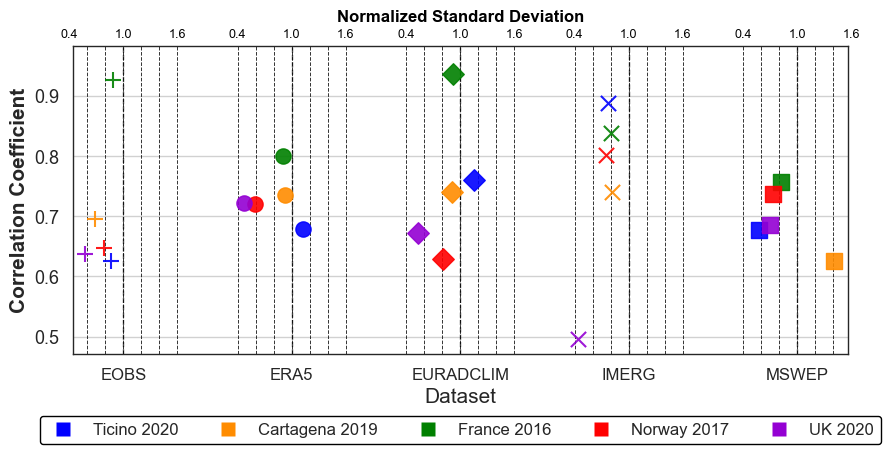

In [240]:
plot_data = []
for dataset_name in sdev.keys():
    sdev_values = sdev[dataset_name]['sdev']
    coef_values = coef[dataset_name]['coef']

    for i, event_name in enumerate(list_in):
        plot_data.append({
            'Dataset': dataset_name,
            'Event': event_name,
            'SDEV': sdev_values[i],
            'COEF': coef_values[i]
        })

df_plot = pd.DataFrame(plot_data)

dataset_order = ['EOBS', 'ERA5', 'EURADCLIM', 'IMERG', 'MSWEP']


df_plot = df_plot[df_plot['Dataset'].isin(dataset_order)].copy()
df_plot['Dataset'] = pd.Categorical(df_plot['Dataset'], categories=dataset_order, ordered=True)
df_plot = df_plot.sort_values('Dataset')

unique_datasets = dataset_order 
unique_events = list_in 




dataset_marker_map = {
    'EOBS': '+',
    'ERA5': 'o',
    'EURADCLIM': 'D', 
    'IMERG': 'x',
    'MSWEP': 's'  
}

event_custom_colors = {
    'Ticino 2020': 'blue',
    'Cartagena 2019': 'darkorange',
    'France 2016': 'green',
    'Norway 2017': 'red',
    'UK 2020': 'darkviolet'
}
event_color_map = {name: event_custom_colors[name] for name in unique_events}



dataset_x_indices = {name: i for i, name in enumerate(unique_datasets)}

# Determine the scaling factor for SDEV within each slot
target_sdev_spread_in_slot = 0.6 # This defines how much SDEV values spread horizontally
max_sdev_abs_dev_from_1 = (df_plot['SDEV'] - 1.0).abs().max()

if max_sdev_abs_dev_from_1 == 0:
    sdev_offset_scale = 0
else:
    sdev_offset_scale = target_sdev_spread_in_slot / (2 * max_sdev_abs_dev_from_1)


plt.figure(figsize=(10, 4)) 
ax = plt.gca() 
sns.set_style("white") 


for spine in ax.spines.values():
    spine.set_linewidth(1.0) # Thicker edge 

# Plot the reference vertical line (SDEV=1.0) for each dataset
for i, dataset_name in enumerate(unique_datasets):
    center_x_pos = dataset_x_indices[dataset_name]
    ax.axvline(x=center_x_pos, color='black', linestyle='--', linewidth=1.0, alpha=0.7,zorder = 1) # Dashed style

# Add SDEV "micro-grid" and labels at the TOP of the graph
sdev_tick_values = [0.4,0.6,0.8, 1.0,1.2,1.4,1.6] # SDEV values to mark on the micro-axis

# Determine the Y position for the SDEV labels at the top
y_sdev_label_pos = ax.get_ylim()[1] 

for i, dataset_name in enumerate(unique_datasets):
    center_x_pos = dataset_x_indices[dataset_name]

    for sdev_val in sdev_tick_values:
        sdev_plot_x = center_x_pos + (sdev_val - 1.0) * sdev_offset_scale
        # Add light vertical grid lines for SDEV
        ax.axvline(x=sdev_plot_x, color='black', linestyle='--', linewidth=0.7, alpha=0.8, zorder = 1)

        
        if sdev_val in [0.4,0.7, 1.0,1.3,1.6]:
            ax.text(sdev_plot_x, y_sdev_label_pos-0.008, # Position at the top
                    f'{sdev_val:.1f}',
                    horizontalalignment='center',
                    verticalalignment='bottom', # Align from bottom to go upwards
                    fontsize=9,
                    color='black')
# Plot each data point
for _, row in df_plot.iterrows():
    dataset_name = row['Dataset']
    event_name = row['Event']
    sdev_val = row['SDEV']
    coef_val = row['COEF']

    plot_x = dataset_x_indices[dataset_name] + (sdev_val - 1.0) * sdev_offset_scale

    ax.scatter(
        plot_x,
        coef_val,
        color=event_color_map[event_name],
        marker=dataset_marker_map[dataset_name],
        s=120,
        alpha=0.9
    )


ax.set_xticks(list(dataset_x_indices.values())) # Place major ticks at each dataset's center
ax.set_xticklabels(list(dataset_x_indices.keys()), fontsize=12) # Label with dataset names
ax.set_xlabel('Dataset', fontsize=15) 


ax.set_ylabel('Correlation Coefficient', fontsize=15, fontweight='bold') 
ax.set_ylim(max(df_plot['COEF'].min() * 0.95, 0.4), min(df_plot['COEF'].max() * 1.05, 1.0)) 
ax.tick_params(axis='y', labelsize=13) 
ax.tick_params(axis='x', labelsize=12) 

plt.text(0.5, 1.08, 'Normalized Standard Deviation', transform=ax.transAxes,
         horizontalalignment='center', fontsize=12, color='black', fontweight='bold')


padding_factor = 0.3
ax.set_xlim(-padding_factor, len(unique_datasets) - 1 + padding_factor)


ax.grid(True, linestyle='-', alpha=0.9, axis='y') 
ax.grid(False, axis='x') 
ax.set_axisbelow(True) 


legend_handles_events = []
for event_name in unique_events:
    handle = plt.Line2D(
        [0], [0],
        marker='s', 
        color='w', 
        label=event_name,
        markerfacecolor=event_color_map[event_name],
        markersize=10,
        markeredgecolor='none', 
        linewidth=0 
    )
    legend_handles_events.append(handle)


ax.legend(handles=legend_handles_events,
          bbox_to_anchor=(0.5, -0.2), 
          loc='upper center',
          borderaxespad=0.,
          ncol=len(unique_events), 
          fontsize=12,
          frameon=True, 
          framealpha=1.0, 
          edgecolor='black') 


plt.savefig('/home/adelaly/BA_work/output/Final/coef_sdev_final.png', bbox_inches='tight')
plt.show()
